# ValiDIAte
A notebook for exploring DIA hits for the sake of validation.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path
from showcase.slicer import SpectrumSlicer

from showcase.isoform_attention import isoform_attention_plot
from showcase.mirror_plotting_2 import plot_mirror_2
from mirror_plotting import plot_mirror_byRT
from showcase.io import prepare_data



## 0. Set up data

In [3]:
main_folder = Path(os.environ.get("MAIN_FOLDER", "~//data/alphadia-validate/")).expanduser()

In [4]:
precursor_df, spectral_library, spectral_library_flat, dia_data = prepare_data(
    main_folder
)

## 1. Select a precursor

In [5]:
# user input: select a hash
selected_hash = precursor_df["mod_seq_charge_hash"].iloc[3000]

# alternatively: use a random one from a certain percentile
# from showcase.small_helpers import get_random_precursor_hash
# selected_hash = get_random_precursor_hash(precursor_df, 0)

## 2. Preprocess

In [6]:
library_wrapper = SpectrumSlicer(spectral_library_flat, precursor_df, dia_data)

mz_library, intensity_library, spectrum_slice, fragment_library = library_wrapper.get_by_hash(
    selected_hash
)

## 3. Plots

### Mirror plots


In [7]:
from mirror_plotting import mirror_w_xic

precursor_entry = precursor_df[precursor_df['mod_seq_charge_hash'] == selected_hash].iloc[0]

mirror_w_xic(spectrum_slice, mz_library, intensity_library, 
                 fragment_library, precursor_entry,
                 width=500, height=300)

alt.HConcatChart(...)

In [8]:
#plot_mirror_2(spectrum_slice, mz_library, intensity_library, )

alt.Chart(...)

### Isoform attention plot

sequence     EIVSVAMAQALEEVRK
mods                         
mod_sites                    
Name: 3000, dtype: object


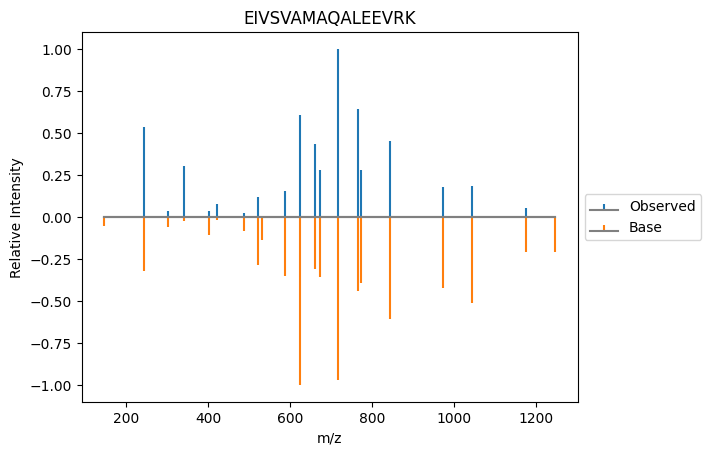

In [10]:
# in case you want to find some precursors with modifications:
# display(precursor_df[~pd.isna(precursor_df["mods"])][["mod_seq_charge_hash", "mods"]].head(10))

isoform_attention_plot(spectral_library_flat, precursor_df, dia_data, selected_hash)

### Shared fragments
In order to play with that plot, use the `shared_fragment_histogram.ipynb` notebook.

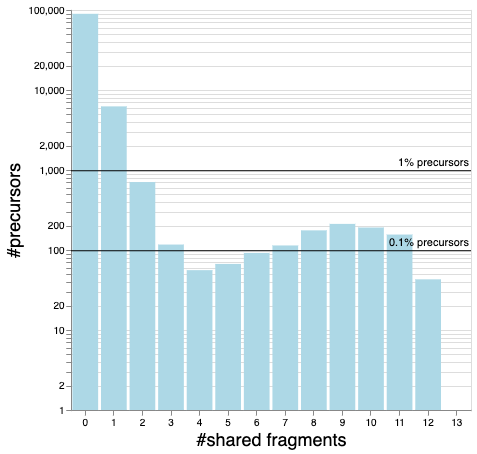

In [3]:
from IPython.display import Image

# Display the image
Image(filename='shared_fragment_histogram.png')